In [1]:
import sys
sys.path.append("../src/")
import pandas as pd
import numpy as np
from scipy import stats

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
csv_path = '../src/outputs_random/run_history_03022023.csv'
# csv_path = '/home/azureuser/cloudfiles/code/outputs/run_history.csv'

df = pd.read_csv(csv_path, sep=';', index_col=0)

In [4]:
df.head(10)

,episode,step,original_payload,state,action,next_state,reward,win
0,1,1,"""' AND 1 = utl_inaddr.get_host_address ( ( ...","""' AND 1 = utl_inaddr.get_host_address ( ( ...",16,"""' AND 1 = utl_inaddr.get_host_address ( ( ...",-0.600000,0
1,1,2,"""' AND 1 = utl_inaddr.get_host_address ( ( ...","""' AND 1 = utl_inaddr.get_host_address ( ( ...",20,"""' AND 1 = utl_inaddr.get_host_address ( ( ...",-0.700000,0
2,1,3,"""' AND 1 = utl_inaddr.get_host_address ( ( ...","""' AND 1 = utl_inaddr.get_host_address ( ( ...",22,"""' AND 1 = utl_inaddr.get_host_address ( ( ...",-0.800000,0
3,1,4,"""' AND 1 = utl_inaddr.get_host_address ( ( ...","""' AND 1 = utl_inaddr.get_host_address ( ( ...",10,"""'\n AND\n 1\n =\n utl_inaddr.get_host_address...",-0.653191,0
4,1,5,"""' AND 1 = utl_inaddr.get_host_address ( ( ...","""'\n AND\n 1\n =\n utl_inaddr.get_host_address...",7,"""'\n AND\n 0x1\n =\n utl_inaddr.get_host_addre...",-0.747280,0
5,1,6,"""' AND 1 = utl_inaddr.get_host_address ( ( ...","""'\n AND\n 0x1\n =\n utl_inaddr.get_host_addre...",12,"""'\n AND\n 0x1\n =\n utl_inaddr.get_host_a...",-0.802817,0
6,1,7,"""' AND 1 = utl_inaddr.get_host_address ( ( ...","""'\n AND\n 0x1\n =\n utl_inaddr.get_host_a...",3,"""'\n AND\n 0x1\n =\n utl_inaddr.get_host_a...",-0.902817,0
7,1,8,"""' AND 1 = utl_inaddr.get_host_address ( ( ...","""'\n AND\n 0x1\n =\n utl_inaddr.get_host_a...",20,"""'\n AND\n 0x1\n =\n utl_inaddr.get_host_a...",-1.002817,0
8,1,9,"""' AND 1 = utl_inaddr.get_host_address ( ( ...","""'\n AND\n 0x1\n =\n utl_inaddr.get_host_a...",8,"""'\n AND\n 0x1\n =\n utl_inaddr.get_host_a...",-1.102817,0
9,1,10,"""' AND 1 = utl_inaddr.get_host_address ( ( ...","""'\n AND\n 0x1\n =\n utl_inaddr.get_host_a...",16,"""'\n AND\n 0x1\n =\n utl_inaddr.get_host_a...",-1.202817,0


In [5]:
df_grouped = df.groupby(['episode']).agg(
    original_payload=pd.NamedAgg(column="original_payload", aggfunc=lambda x: stats.mode(x)[0][0]),
    num_mutations=pd.NamedAgg(column="step", aggfunc="max"),
    reward_avg=pd.NamedAgg(column="reward", aggfunc=np.mean),
    total_score=pd.NamedAgg(column="reward", aggfunc="sum"),
    win=pd.NamedAgg(column="win", aggfunc="sum")
)

In [6]:
df_grouped = df.groupby(['episode']).agg(
    # original_payload=pd.NamedAgg(column="original_payload", aggfunc=lambda x: stats.mode(x)[0][0]),
    num_mutations=pd.NamedAgg(column="step", aggfunc="max"),
    reward_avg=pd.NamedAgg(column="reward", aggfunc=np.mean),
    total_score=pd.NamedAgg(column="reward", aggfunc="sum"),
    win=pd.NamedAgg(column="win", aggfunc="sum")
)

In [7]:
df_grouped.head()

,num_mutations,reward_avg,total_score,win
episode,,,,
1,30,-1.811914,-54.357421,0
2,30,-1.562344,-46.870326,0
3,30,-1.641748,-49.252433,0
4,30,-1.736088,-52.082649,0
5,30,-1.737209,-52.116265,0


Extraño, debería haber un reward más alto para el ganador

In [8]:
df_eps2 = df[df["episode"]==2]

In [9]:
df_eps2

,episode,step,original_payload,state,action,next_state,reward,win
30,2,1,uni/**/on sel/**/ect,uni/**/on sel/**/ect,10,uni/**/on\n sel/**/ect,-0.857143,0
31,2,2,uni/**/on sel/**/ect,uni/**/on\n sel/**/ect,14,uni/**/on\n#6Lt6H\nsel/**/ect,-0.592593,0
32,2,3,uni/**/on sel/**/ect,uni/**/on\n#6Lt6H\nsel/**/ect,15,uni/**/on\n#6Lt6H\nsel/**/ect,-0.592593,0
33,2,4,uni/**/on sel/**/ect,uni/**/on\n#6Lt6H\nsel/**/ect,21,uni/**/on\n#6Lt6H\nsel/**/ect,-0.592593,0
34,2,5,uni/**/on sel/**/ect,uni/**/on\n#6Lt6H\nsel/**/ect,21,uni/**/on\n#6Lt6H\nsel/**/ect,-0.592593,0
35,2,6,uni/**/on sel/**/ect,uni/**/on\n#6Lt6H\nsel/**/ect,10,uni/**/on\n#6Lt6H\nsel/**/ect,-0.592593,0
36,2,7,uni/**/on sel/**/ect,uni/**/on\n#6Lt6H\nsel/**/ect,24,uni/**/on\n OR 0#6Lt6H\nsel/**/ect,-0.593750,0
37,2,8,uni/**/on sel/**/ect,uni/**/on\n OR 0#6Lt6H\nsel/**/ect,14,uni/**/on\n#Mze=iEK\nOR#Mze=iEK\n0#6Lt6H\nsel/...,-0.333333,0
38,2,9,uni/**/on sel/**/ect,uni/**/on\n#Mze=iEK\nOR#Mze=iEK\n0#6Lt6H\nsel/...,5,uni/**/on\n#Mze=iEK\nOR#Mze=iEK\n0#6Lt6H\nsel/...,-0.333333,0
39,2,10,uni/**/on sel/**/ect,uni/**/on\n#Mze=iEK\nOR#Mze=iEK\n0#6Lt6H\nsel/...,0,uni/**/on\n#Mze=iEK\nOR#Mze=iEK\n0#6Lt6H\nsel/...,-0.333333,0


Ok, cual es el % de victorias? Ese debería ser el KPI principal


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8779b8b850>]],
      dtype=object)

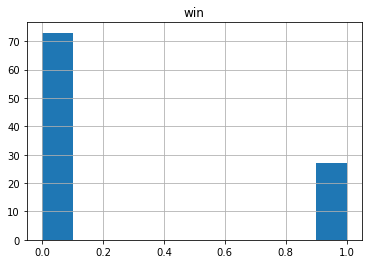

In [8]:
df_grouped.hist("win")

En serio?

In [9]:
np.sum(df_grouped["win"])

27

O sea, con puro random hemos ganado el 63% de las veces? Aqui falla algo...

In [10]:
all_stats = df_grouped.groupby("original_payload").agg(
    num_eps=pd.NamedAgg(column="original_payload", aggfunc="count"),
    num_win=pd.NamedAgg(column="win", aggfunc="sum"),
    prop_win=pd.NamedAgg(column="win", aggfunc="mean"),
)
all_stats.sort_values("prop_win", ascending=False).head(20)

KeyError: 'original_payload'

In [12]:
winners = df_grouped[df_grouped.win == 1]

winners_stats = winners.groupby("original_payload").agg(
    num_wins=pd.NamedAgg(column="win", aggfunc="sum"),
    min_mutations_win=pd.NamedAgg(column="num_mutations", aggfunc="min"),
    mean_mutations_win=pd.NamedAgg(column="num_mutations", aggfunc="mean"),
    max_mutations_win=pd.NamedAgg(column="num_mutations", aggfunc="max"),
    std_mutations_win=pd.NamedAgg(column="num_mutations", aggfunc="std")
)
winners_stats.head()
winners_stats.sort_values("mean_mutations_win", ascending=True).head(20)

,num_wins,min_mutations_win,mean_mutations_win,max_mutations_win,std_mutations_win
original_payload,,,,,
' or a = a--,1,1,1.0,1,NaN
""""""" or 1 = 1--""",1,1,1.0,1,NaN
""""""" or pg_sleep ( __TIME__ ) --""",1,1,1.0,1,NaN
""" select * from users where id = 1 or """"1["""" or 1 = 1 -- 1""",1,1,1.0,1,NaN
0x77616974666F722064656C61792027303A303A313027 ...,1,1,1.0,1,NaN
hi or a = a,1,1,1.0,1,NaN
""""""" ) or pg_sleep ( __TIME__ ) --""",1,1,1.0,1,NaN
sqlvuln;,1,1,1.0,1,NaN
1 or pg_sleep ( __TIME__ ) --,1,2,2.0,2,NaN


In [11]:
df_last = df.sort_values(["episode", "mutation_num"]).drop_duplicates(["eps_id"], keep="last")
df_last["win_cummean"] = df_last["win"].expanding().mean()
df_last.plot(x="episode", y="win_cummean", xlabel="Episode", ylabel="Cummulative win proportion", figsize=(8,4), label="Global");


KeyError: 'mutation_num'

KeyError: 'mutation_num'

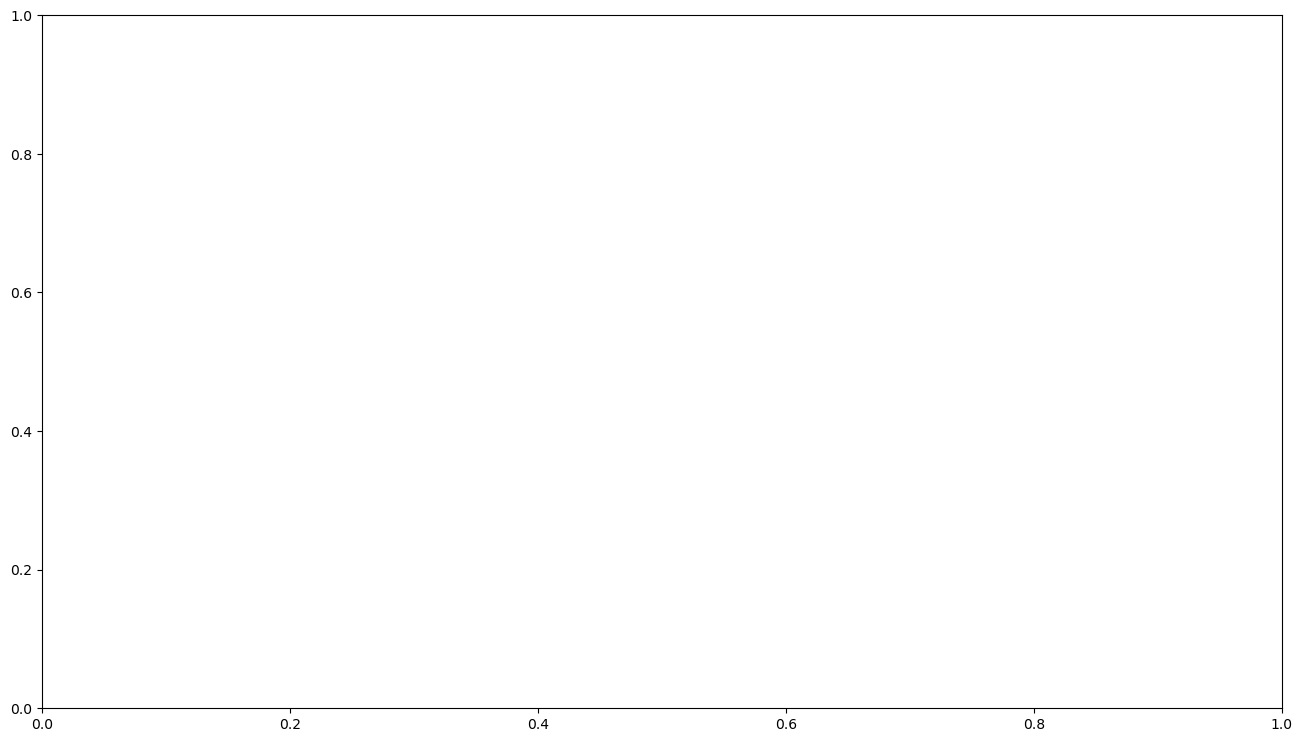

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 9))
df_last = df.sort_values(["episode", "mutation_num"]).drop_duplicates(["episode"], keep="last")

df_last["win_cummean"] = df_last["win"].expanding().mean()
df_last.plot(x="episode", y="win_cummean", ax=ax, label="global", ylabel="Cummulative win proportion", xlabel="Episode");

for original_payload in df_last["original_payload"].unique():
    df_last_p = df_last[df_last["original_payload"] == original_payload]
    df_last_p["win_cummean"] = df_last_p["win"].expanding().mean()
    df_last_p = df_last_p.set_index("episode").reindex(df_last.episode, method="ffill", fill_value=0).reset_index()
    df_last_p.plot(x="episode", y="win_cummean", ax=ax, label=original_payload[:20], ylabel="Cummulative win proportion", xlabel="Episode")

Plot some of the last wins

In [13]:
df.tail(40)

,episode,step,original_payload,action,payload,reward,win
11938,999,21,a' or '1'='1';#,12,a'#%2n2d#\nor#%2n2d#\n'1'='1';#,7.566666,0
11939,999,22,a' or '1'='1';#,12,a'#%2n2d#\nor#%2n2d#\n'1'='1';#,7.466666,0
11940,999,23,a' or '1'='1';#,9,a'#%2n2d#\nor#%2n2d#\n'1'='1';#,7.366666,0
11941,999,24,a' or '1'='1';#,9,a'#%2n2d#\nor#%2n2d#\n'1'='1';#,7.266666,0
11942,999,25,a' or '1'='1';#,9,a'#%2n2d#\nor#%2n2d#\n'1'='1';#,7.166666,0
11943,999,26,a' or '1'='1';#,9,a'#%2n2d#\nor#%2n2d#\n'1'='1';#,7.066666,0
11944,999,27,a' or '1'='1';#,9,a'#%2n2d#\nor#%2n2d#\n'1'='1';#,6.966666,0
11945,999,28,a' or '1'='1';#,9,a'#%2n2d#\nor#%2n2d#\n'1'='1';#,6.866666,0
11946,999,29,a' or '1'='1';#,9,a'#%2n2d#\nor#%2n2d#\n'1'='1';#,6.766666,0
11947,999,30,a' or '1'='1';#,9,a'#%2n2d#\nor#%2n2d#\n'1'='1';#,6.666666,0
